## E Commerce Customer Churn

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1aNPneUhXqo_rNQF7PGn6IQwalapQH2Bk?usp=sharing)

This project is inspired by [Yeo Jie Hui](https://my.linkedin.com/in/yeo-jie-hui)'s Data Science [Final Year Project](https://drive.google.com/file/d/1dD_I4pSMqhEnLbed1jQ90sJU-SQt7cTE/view?usp=sharing) on predicting customer churn based on their behaviours online.

![dataset-cover-image](https://storage.googleapis.com/kaggle-datasets-images/1119908/1880629/b6c5bfee749cbbd81af3a922070a9d24/dataset-cover.jpg?t=2021-01-26-10-32-22)

The dataset source is from Kaggle's [E Commerce Dataset](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction). However to ease the data upload without the need of using the Kaggle API key, I have loaded the data to GitHub and we will be reading the uploaded data by cloning the [GitHub repository](https://github.com/dscum/DSSR2023).

In [1]:
# Initialize workspace
!git clone https://github.com/dscum/DSSR2023.git

Cloning into 'DSSR2023'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 6), reused 17 (delta 3), pack-reused 0
Receiving objects: 100% (25/25), 1020.71 KiB | 8.65 MiB/s, done.
Resolving deltas: 100% (6/6), done.


## Import Libraries

Now we will import the 3 common libraries that are used for Data Cleaning and Exploratory Data Analysis:

* [Numpy](https://numpy.org/)
* [Pandas](https://pandas.pydata.org/)
* [Matplotlib](https://matplotlib.org/)

To make our chart nicer, we will also import the famous [Seaborn](https://seaborn.pydata.org/) library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data Dictionary - Understand Dataset Description

In [3]:
datadict = pd.read_csv('/content/DSSR2023/E-Commerce-Dataset/datadict.csv')
datadict

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


Read Dataset

In [4]:
ecom_df = pd.read_csv('/content/DSSR2023/E-Commerce-Dataset/dataset.csv')
ecom_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


## Data Cleaning

Check how many rows and columns of the `ecom_df` using `.shape` attribute.

In [5]:
ecom_df.shape

(5630, 20)

### Check Data Types

Check if the datatype for each column of the `ecom_df` meets our expectation using the `.dtypes` attribute.

In [6]:
ecom_df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

Seems like the data types are as what we expect, we can we can proceed to our next data cleaning step.

### Drop Unwanted Columns

Looking at the columns of our dataset, we can say that the `CustoemrID` column is fully independent with the churn outcome, so we can remove this column from our dataset.

In [7]:
ecom_df.drop(columns='CustomerID', inplace=True)

### Check Duplication and Null Values

Now we will proceed with checking if there is any duplicated rows in our dataset using the `duplicated()` method.

> The `pandas.DataFrame.duplicated` returns a boolean `Series` denoting duplicate rows. So, when a row is duplicated, it will return a `True` value for that row in the series.

Since we just want to see how many rows are duplicate rows, we can again use the `sum()` method to calculate the total duplicated rows.

In [8]:
ecom_df.duplicated().sum()

556

There are several rows that are duplicated, we can remove them using the `pd.drop_duplicate()` method.

In [9]:
ecom_df.drop_duplicates(inplace=True)
ecom_df.duplicated().sum()

0

Now, we proceed with checking for null values using `isnull()` method, then calculate how many null values for each column with the `sum()` method.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
ecom_df.isnull().sum()

Churn                            0
Tenure                         231
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                221
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 230
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    252
CouponUsed                     210
OrderCount                     243
DaySinceLastOrder              288
CashbackAmount                   0
dtype: int64

Looks like we have quite a few columns having null (`NaN`) values, which we will need to deal with it later on.

Then, let's further explore on how many rows in total has null values. The approach is to see if there is **any** column in that row that contains a null value, then we wlil consider it as a row with null values.

* `axis=1` will check column by column, whereas `axis=0` will check row by row
* We use `any()` to see if any column in that row is a null value

In [11]:
ecom_df.isnull().any(axis=1).sum()

1675

One common way to deal with null values is to drop these rows off (remove them) from the dataframe.

However in this case, that is roughly 33% of our whole data, which means that by using this approach we will lose 33% of the data, which is a very huge number.

Hence, we will have to deal with this problem with another approach called [imputation](https://www.projectpro.io/recipes/impute-missing-values-with-means-in-python). We can impute those null values by either of the following measure of central tendencies:

* Mean: Useful for continuous data without outliers
* Median: Useful for continuous data with outliers
* Mode: Useful for categorical variables

To ease ourselves, we can use the `describe()` method on our `ecom_df` to display the list of statistics related to our dataframe.

> The `transpose()` method is used to switch the rows and the columns, so we will have the `ecom_df` column names as the row label and the statistics as the column label.

In [12]:
ecom_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5074.0,0.165747,0.371890,0.0,0.0,0.0,0.0,1.0
Tenure,4843.0,10.213917,8.590125,0.0,2.0,9.0,16.0,61.0
CityTier,5074.0,1.658455,0.919284,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,4853.0,15.546260,8.598909,5.0,9.0,13.0,20.0,127.0
HourSpendOnApp,4844.0,2.929191,0.723733,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5074.0,3.686244,1.029670,1.0,3.0,4.0,4.0,6.0
SatisfactionScore,5074.0,3.027986,1.384493,1.0,2.0,3.0,4.0,5.0
NumberOfAddress,5074.0,4.194521,2.578819,1.0,2.0,3.0,6.0,22.0
Complain,5074.0,0.282617,0.450316,0.0,0.0,0.0,1.0,1.0
OrderAmountHikeFromlastYear,4822.0,15.714019,3.681655,11.0,13.0,15.0,18.0,26.0


In [13]:
ecom_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5074.0,0.165747,0.371890,0.0,0.0,0.0,0.0,1.0
Tenure,4843.0,10.213917,8.590125,0.0,2.0,9.0,16.0,61.0
CityTier,5074.0,1.658455,0.919284,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,4853.0,15.546260,8.598909,5.0,9.0,13.0,20.0,127.0
HourSpendOnApp,4844.0,2.929191,0.723733,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5074.0,3.686244,1.029670,1.0,3.0,4.0,4.0,6.0
SatisfactionScore,5074.0,3.027986,1.384493,1.0,2.0,3.0,4.0,5.0
NumberOfAddress,5074.0,4.194521,2.578819,1.0,2.0,3.0,6.0,22.0
Complain,5074.0,0.282617,0.450316,0.0,0.0,0.0,1.0,1.0
OrderAmountHikeFromlastYear,4822.0,15.714019,3.681655,11.0,13.0,15.0,18.0,26.0


In [14]:
print(ecom_df.isnull().any(axis=1).sum())
print(ecom_df.isnull().sum())

1675
Churn                            0
Tenure                         231
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                221
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 230
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    252
CouponUsed                     210
OrderCount                     243
DaySinceLastOrder              288
CashbackAmount                   0
dtype: int64


We can further filter the result to display only the `ecom_df` columns with null values.

In [15]:
columns_with_null = ecom_df.loc[:, ecom_df.isna().any()]
columns_with_null.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,4843.0,10.213917,8.590125,0.0,2.0,9.0,16.0,61.0
WarehouseToHome,4853.0,15.546260,8.598909,5.0,9.0,13.0,20.0,127.0
HourSpendOnApp,4844.0,2.929191,0.723733,0.0,2.0,3.0,3.0,5.0
OrderAmountHikeFromlastYear,4822.0,15.714019,3.681655,11.0,13.0,15.0,18.0,26.0
CouponUsed,4864.0,1.805921,1.946899,0.0,1.0,1.0,2.0,16.0
OrderCount,4831.0,3.093562,2.995224,1.0,1.0,2.0,3.0,16.0
DaySinceLastOrder,4786.0,4.581906,3.662581,0.0,2.0,3.0,7.0,46.0


Looks like the `mean` and `50%` (median) of these columns having null values are similar or close to each other,  we can just fill the null values with the `mean`.

Since mean values are `float64` data type, we can check the data type of the columns involve to see if we need to do any conversions.

In [16]:
columns_with_null.dtypes

Tenure                         float64
WarehouseToHome                float64
HourSpendOnApp                 float64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
dtype: object

Looks like all columns are also `float64` data type, so we can simply impute the null values column by column with their respective mean value.

In [17]:
for col in columns_with_null:
    ecom_df[col].fillna(ecom_df[col].mean(), inplace=True)

# Check if all null values are imputed
ecom_df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Since previously we suspect that there is outliers, we can plot a box plot on each numerical columns to validate our suspection. Since we will be using the Q1 and Q3 to remove outliers later, we will use the `describe()` method again to get the statistics and numerical columns.

We will exclude the following categorical columns having numerical values:

* `Churn` column as it will be 0 or 1, indicating if there is a churn or not.
* `CityTier` column as it will be 1, 2 or 3, indicating the tier of the city.
* `Complain` column as it will be 0 or 1, indicating if there is any complain made or not.

<Figure size 1600x1000 with 0 Axes>

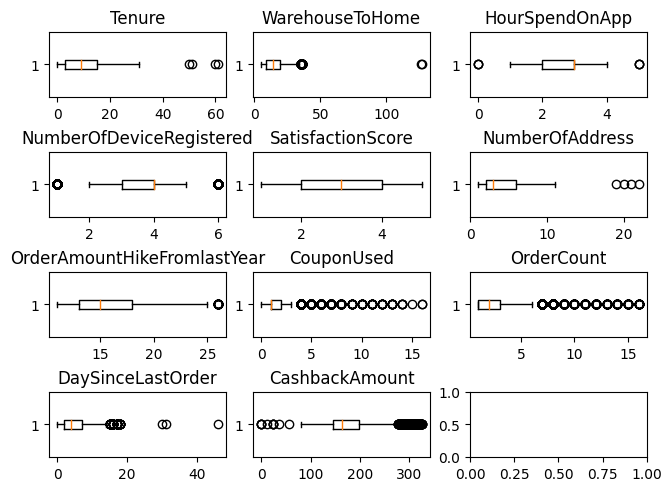

In [18]:
ecom_df_stats = ecom_df.describe()
ecom_df_stats.drop(columns=['Churn', 'CityTier', 'Complain'], inplace=True)

# Plot Boxplots
plt.figure(figsize=(16,10))

fig, ax = plt.subplots((len(ecom_df_stats.columns) // 3 + 1), 3, layout='constrained')

for i, col in enumerate(ecom_df_stats.columns):

    ax[i//3, i%3].boxplot(ecom_df[col], vert=False)
    ax[i//3, i%3].set_title(col)

As we can see from the subplots, there are quite a number of numerical columns that actually contains outliers (denoted by `o`). We can remove these outliers so that they won't affect our analysis result and training data quality.

The mathematical method to remove outlier is to keep the values between Q1 - 1.5(IQR) and Q3 + 1.5(IQR).

The conventional way to obtain Q1 and Q3 is to use the `np.percentile()` method, but in this case, we reuse the values calculated from the `describe()` dataframe.

In [19]:
for col in ecom_df_stats.columns:

    Q1 = ecom_df_stats.loc['25%', col]
    Q3 = ecom_df_stats.loc['75%', col]
    IQR = Q3 - Q1

    ecom_df = ecom_df[(ecom_df[col] >= (Q1 - 1.5 * IQR)) & (ecom_df[col] <= (Q3 + 1.5 * IQR))]

ecom_df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.000000,160
1,1,10.213917,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.000000,121
2,1,10.213917,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.000000,120
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.000000,134
4,1,0.000000,Phone,1,12.0,CC,Male,2.929191,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.000000,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,0,5.000000,Computer,1,12.0,Credit Card,Male,4.000000,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,4.581906,224
5624,0,1.000000,Mobile Phone,3,12.0,UPI,Female,2.000000,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.000000,155
5626,0,13.000000,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.581906,225
5627,0,1.000000,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.000000,186


We have successfully removed the outliers from our dataset.

### Data Consistency Check

Usually there exists data inconsistencies within columns with String values or Timestamp values, so we can check the unique values within those columns to see if any two or more values refer to the same thing.

In [20]:
for col in ecom_df.columns:

    if ecom_df[col].dtypes == 'object':

        print(ecom_df[col].value_counts())
        print()

Mobile Phone    1571
Computer        1039
Phone            915
Name: PreferredLoginDevice, dtype: int64

Debit Card          1472
Credit Card          863
E wallet             399
UPI                  258
COD                  245
CC                   209
Cash on Delivery      79
Name: PreferredPaymentMode, dtype: int64

Male      2143
Female    1382
Name: Gender, dtype: int64

Laptop & Accessory    1359
Mobile Phone           946
Mobile                 610
Fashion                475
Grocery                135
Name: PreferedOrderCat, dtype: int64

Married     1777
Single      1159
Divorced     589
Name: MaritalStatus, dtype: int64



Looking at the `PreferredLoginDevice`, `PreferredPaymentMode` and `PreferedOrderCat` column, we can see that there exists data inconsistencies:

* 'COD' & 'Cash on Delivery' are the same
* 'CC' & 'Credit Card' are the same
* 'Mobile' & 'Mobile Phone' are the same
* 'Phone' & 'Mobile Phone' are the same

So, we will need to replace the inconsistent values within this dataframe:

In [21]:
ecom_df.replace({
    'COD': 'Cash on Delivery',
    'CC': 'Credit Card',
    'Mobile': 'Mobile Phone',
    'Phone': 'Mobile Phone',
},
inplace=True)

ecom_df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.000000,160
1,1,10.213917,Mobile Phone,1,8.0,UPI,Male,3.000000,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.000000,121
2,1,10.213917,Mobile Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.000000,120
3,1,0.000000,Mobile Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.000000,134
4,1,0.000000,Mobile Phone,1,12.0,Credit Card,Male,2.929191,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.000000,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,0,5.000000,Computer,1,12.0,Credit Card,Male,4.000000,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,4.581906,224
5624,0,1.000000,Mobile Phone,3,12.0,UPI,Female,2.000000,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.000000,155
5626,0,13.000000,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.581906,225
5627,0,1.000000,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.000000,186


## Exploratory Data Analysis

Now that we have done our general data cleaning steps, we can proceed to explore our data and analyse it further.

### Churn Correlation

Since we are going to predict a customer's churn, so we can look at how different variable is correlated to the churn outcome using a correlation heatmap.

<ipython-input-22-5cda6ef7191a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ecom_df.corr(), annot=True, cmap=sns.color_palette('flare', as_cmap=True))


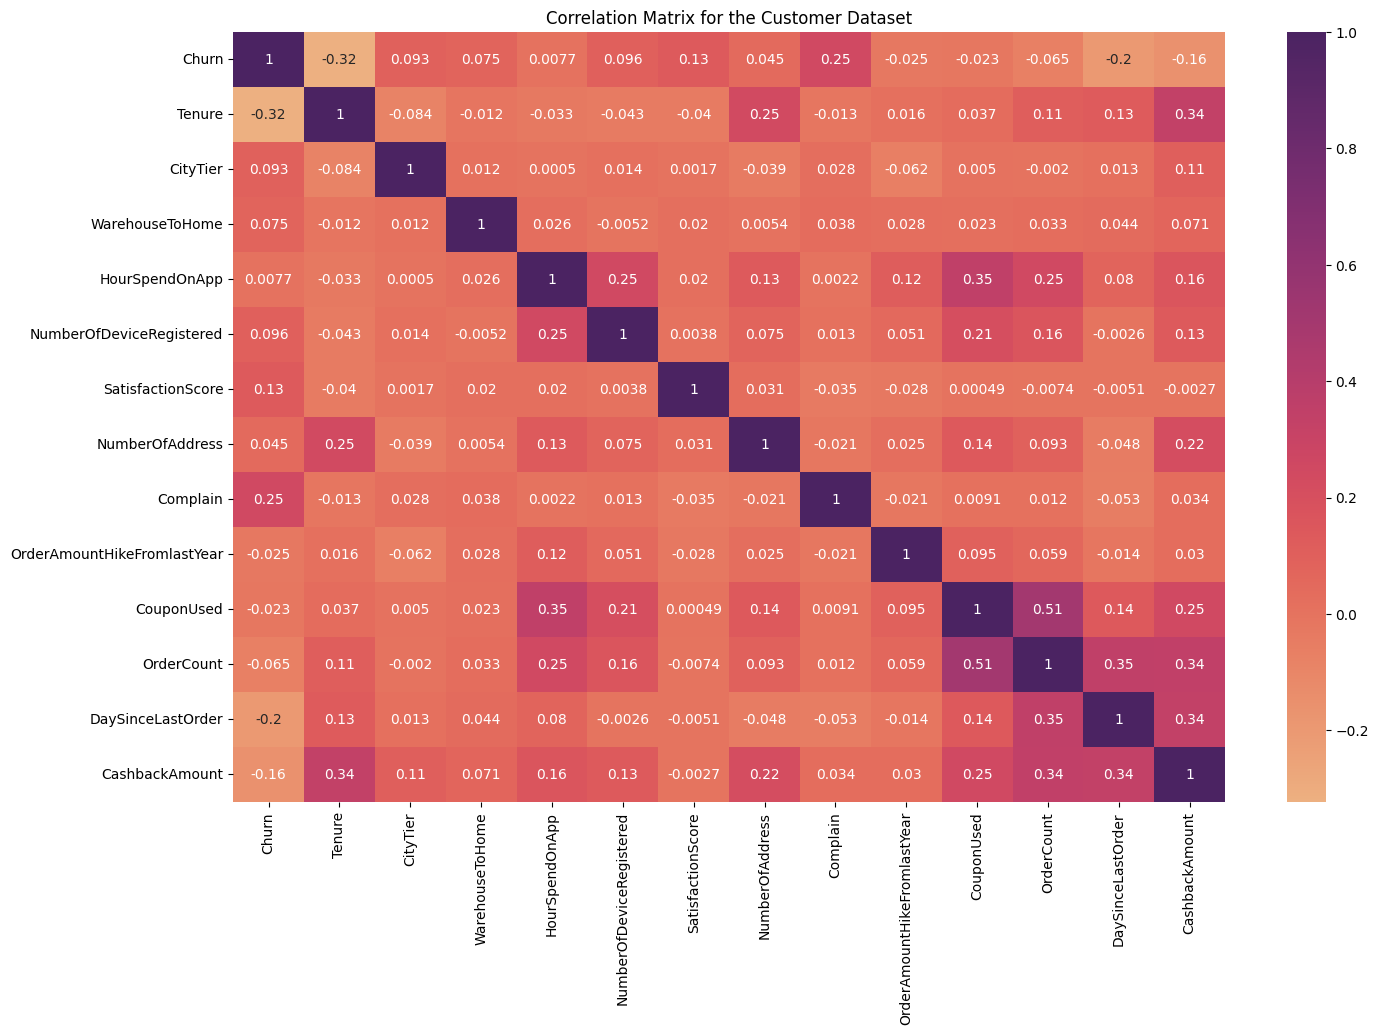

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(ecom_df.corr(), annot=True, cmap=sns.color_palette('flare', as_cmap=True))
plt.title('Correlation Matrix for the Customer Dataset')
plt.show()

Just by looking at the first row, we can see how different columns correlate with `Churn`.

* Correlation values that are closer to 0 indicates a weak correlation between the 2 columns.
* Correlation values that are closer to -1 or 1 indicates a strong correlation between the 2 columns.

We can see that `Churn` is not strongly correlated with any columns, but it is slightly correlated with:

* `Tenure`: -0.33
* `Complain`: 0.25
* `DaySinceLastOrder`: -0.20

Let's visualize each's relation:

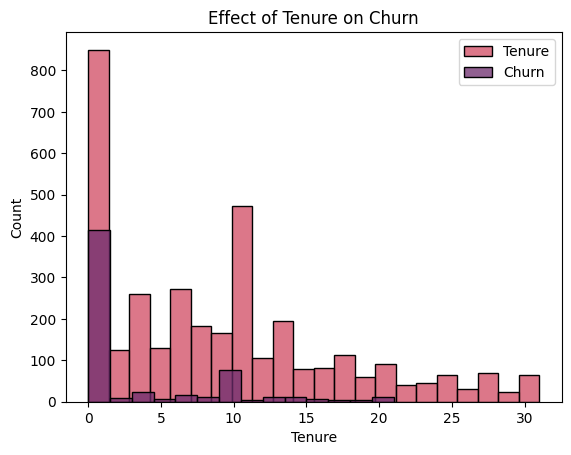

In [23]:
sns.histplot(x='Tenure', data=ecom_df, color=sns.color_palette("flare")[2])
sns.histplot(x='Tenure', data=ecom_df[ecom_df['Churn'] == 1], color=sns.color_palette("flare")[-1])
plt.title('Effect of Tenure on Churn')
plt.legend(labels=['Tenure', 'Churn'])

Text(0.5, 1.0, 'Effect of Complain on Churn')

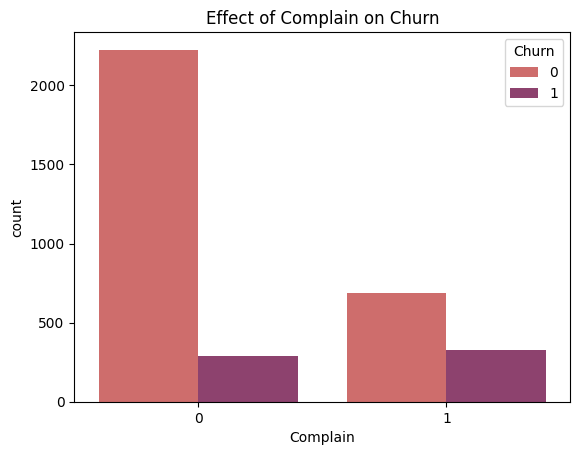

In [24]:
sns.countplot(x='Complain', hue='Churn', data=ecom_df, palette='flare')
plt.title('Effect of Complain on Churn')

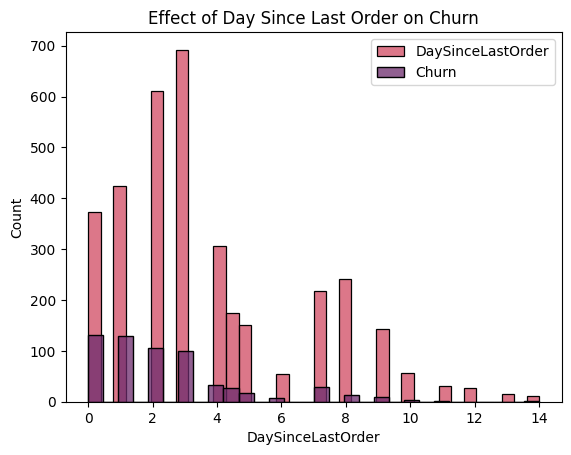

In [25]:
sns.histplot(x='DaySinceLastOrder', data=ecom_df, color=sns.color_palette('flare')[2])
sns.histplot(x='DaySinceLastOrder', data=ecom_df[ecom_df['Churn'] == 1], color=sns.color_palette('flare')[-1])
plt.title('Effect of Day Since Last Order on Churn')
plt.legend(labels=['DaySinceLastOrder', 'Churn'])

### Pair Plot

We can use the `sns.pairplot()` method to pair up different column values and display each pair in their respective chart which forms a matrix.

In [26]:
# sns.pairplot(ecom_df, hue='Churn', palette='flare')

### Other Visualizations

If you wish to understand and explore the data even further, you can continue experimenting with other visualizations.

Text(0.5, 1.0, 'Effect of Gender on Churn')

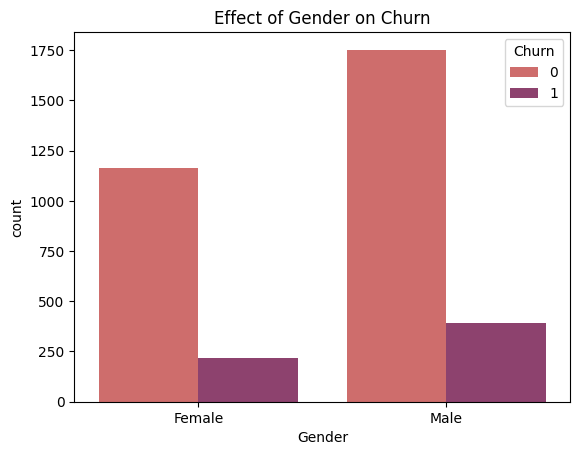

In [27]:
sns.countplot(x='Gender', hue='Churn', data=ecom_df, palette='flare')
plt.title('Effect of Gender on Churn')

Text(0.5, 1.0, 'Effect of PreferredLoginDevice on Churn')

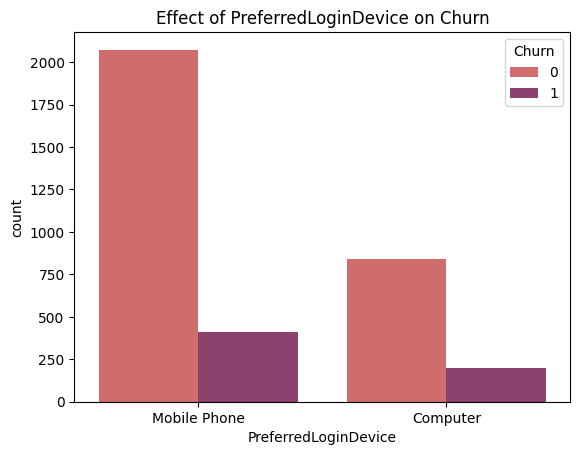

In [28]:
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=ecom_df, palette='flare')
plt.title('Effect of PreferredLoginDevice on Churn')

Text(0.5, 1.0, 'Effect of PreferredPaymentMode on Churn')

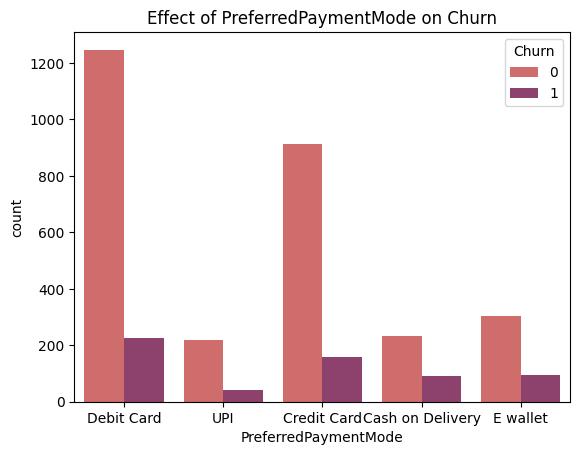

In [29]:
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=ecom_df, palette='flare')
plt.title('Effect of PreferredPaymentMode on Churn')

Text(0.5, 1.0, 'Effect of PreferedOrderCat on Churn')

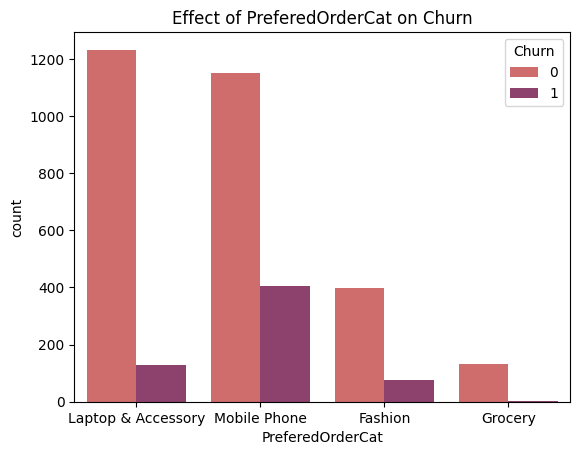

In [30]:
sns.countplot(x='PreferedOrderCat', hue='Churn', data=ecom_df, palette='flare')
plt.title('Effect of PreferedOrderCat on Churn')

Now that we are done with data cleaning, we can export our cleaned dataset as a checkpoint and for future use.

In [31]:
ecom_df.reset_index(drop=True).to_csv('cleaned_data.csv')

## Data Preprocessing

After we have explored and have a better understanding about our dataset, we can proceed to the Machine Learning (ML) stage to predict our churn probability. Before we start training our ML model, we need to preprocess our dataset first.

We can first separate out our feature and label columns conventionally called `X` and `y`

In [32]:
X = ecom_df.copy()
y = X.pop('Churn')

Then, we can also separate our feature columns into categorical and numerical columns to perform specific preprocessing steps to each type.

In [33]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

### Categorical Encoding

Most ML model will take numerical values as input to calculate the final output using an unknown formula. However, our dataset contains some columns containing categorical values where we can convert into numerical representations.

The few popular techniques to encode categorical values into numerical values are [Label Encoding](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/) and [One-Hot Encoding](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/).

Here, we will perform One Hot Encoding technique using the `get_dummies()` method from `pandas` library. We set `drop_first=True` to remove one column from each "dummy feature" which will reduce redundancies and let the other columns be independent to each other.

In [34]:
X_cat = pd.get_dummies(X[categorical_cols], drop_first=True)
X_cat

,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,MaritalStatus_Married,MaritalStatus_Single
0,1,0,1,0,0,0,0,1,0,0,1
1,1,0,0,0,1,1,0,0,1,0,1
2,1,0,1,0,0,1,0,0,1,0,1
3,1,0,1,0,0,1,0,1,0,0,1
4,1,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5623,0,1,0,0,0,1,0,1,0,0,1
5624,1,0,0,0,1,0,0,0,1,0,1
5626,1,1,0,0,0,1,0,0,0,1,0
5627,1,0,1,0,0,1,0,1,0,1,0


### Numerical Scaling

The values in the numerical columns may vary in terms of their range and variance, i.e. one column having values ranging from 0 to 325 (`CashbackAmount`) and another column having values ranging from 0 to 5 (`HourSpentOnApp`).

It is a good practice to scale each numerical values so to reduce any effect on the calculations in the model. Two common scaling techniques are Standard Scaling (scaling numerical values to have the mean 0 and variance of 1) and Min-Max Scaling (scaling numerical values to range of 0 to 1 inclusive).

In this case, we are going to use the Standard Scaling Technique to scale all numerical columns.

In [35]:
from sklearn.preprocessing import StandardScaler

X[numerical_cols] = StandardScaler().fit_transform(X[numerical_cols])

Then, we just need to combine both Encoded Categorical columns and Scaled Numerical Columns together using `pd.concat` method.

In [36]:
X = pd.concat([X[numerical_cols], X_cat], axis=1)

### Data Imbalance

Just by looking at the charts above, we can clearly see a strong imbalance in our label (`Churn`) column. We can plot a bar chart to visualize this problem.

Text(0.5, 1.0, 'Distribution of Churn in Dataset')

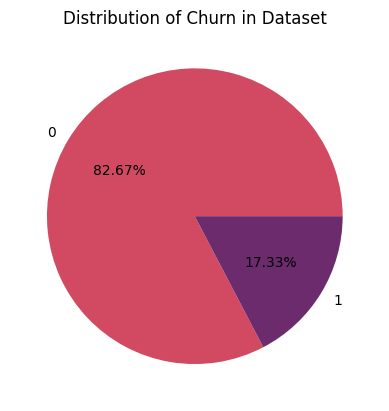

In [37]:
plt.pie(y.value_counts(),
        labels=y.value_counts().index,
        autopct='%.2f%%',
        colors=[sns.color_palette('flare')[2], sns.color_palette('flare')[-1]])
plt.title('Distribution of Churn in Dataset')

The `not_churn` (`Churn = 0`) takes up 82.08% of the whole dataset, which is a crucial problem that we need to handle to prevent bias (it is very unlikely to get a customer churn).

We can fix the data imbalance problem with **resampling**. There are 3 popular ways to perform resampling:

* Random Undersampling: Removing random records from the majority class.
* Random Oversampling: Adding random duplicates from the minority class.
* Synthetic Data Undersampling / Oversampling: Group values in majority class to reduce data points or generate values within minority classs to increase data points.

In this case, we will be using a combination of Synthetic Data Oversampling and Synthetic Data Undersampling technique called [Synthetic Minority Oversampling Technique (SMOTE)](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#h-smote-synthetic-minority-oversampling-technique) and [Edited Nearest Neighbour (ENN)](https://bobrupakroy.medium.com/edited-nearest-neighbors-enn-c446a15e4bbe), whose combination is known as the [SMOTEENN algorithm](https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50) which can be accessed from the `imblearn` library.

Text(0.5, 1.0, 'Distribution of Churn in Resampled Dataset')

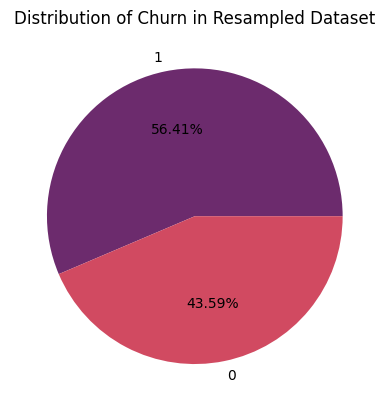

In [38]:
from imblearn.combine import SMOTEENN

X, y = SMOTEENN(random_state=161223).fit_resample(X, y)

# Plot distribution of Churn
plt.pie(y.value_counts(),
        labels=y.value_counts().index,
        autopct='%.2f%%',
        colors=[sns.color_palette('flare')[-1], sns.color_palette('flare')[2]])
plt.title('Distribution of Churn in Resampled Dataset')

Here, we can see that we have quite balanced data points  for each class in our `Churn` column.

In [39]:
balance_clean_data = pd.concat([X, y], axis=1)
balance_clean_data

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,MaritalStatus_Married,MaritalStatus_Single,Churn
0,-0.142524,1.472648,-1.217219,0.112616,-0.894640,0.718205,-0.859745,-0.635031,-0.752391,-0.210514,...,0,1,0,1,0,0,0,0,0,0
1,0.137437,1.472648,-0.413057,-1.314825,-0.894640,-0.009287,-0.469706,1.574726,1.233835,-1.406272,...,0,1,0,1,0,1,0,0,0,0
2,-0.521890,1.472648,-0.145004,-1.314825,-0.894640,-0.736780,-0.859745,-0.635031,-0.468645,0.985244,...,0,1,0,0,0,0,0,0,1,0
3,-0.901255,-0.712152,-1.217219,-1.314825,-0.894640,-0.009287,-0.859745,-0.635031,-0.752391,-1.406272,...,0,0,0,1,0,1,0,0,0,0
4,2.639491,-0.712152,-0.010977,0.112616,0.348895,0.718205,0.310371,1.574726,1.233835,-0.210514,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,0.556761,-0.712152,-0.063344,-1.314825,-0.894640,0.171371,2.115278,1.574726,-0.965675,-0.210514,...,1,0,0,1,0,0,1,0,0,1
5132,-0.812501,1.472648,-0.293183,-0.029241,0.472476,-1.464272,0.387894,-0.415428,-0.213097,-0.329347,...,0,0,0,1,0,1,0,1,0,1
5133,-0.268979,-0.712152,0.062237,-1.311046,-0.894640,0.718205,-0.859745,1.574726,-1.036138,-0.207349,...,0,0,0,1,0,0,1,1,0,1
5134,0.616207,1.472648,-0.973849,1.540057,0.348895,-0.009287,1.870526,-0.635031,-0.752391,0.985244,...,1,0,0,1,0,1,0,1,0,1


We can save this cleaned data as our data checkpoint.

In [40]:
balance_clean_data.to_csv('balance_cleaned_data.csv')

Now that we are done with data pre-processing, we can finally proceed to train our ML model.

## Machine Learning (ML)

In this section, we are using Machine Learning techniques to predict if a customer will churn or not based on the list of features `X`.

### Splitting Train and Test Data

Like every ML training steps, we will start with a train-test split on our data.

In [41]:
from sklearn.model_selection import train_test_split

X = pd.read_csv('balance_cleaned_data.csv', index_col=0)
y = X.pop('Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=161223)

We splitted our dataset into Train Data and Test Data, where the Train Data takes a random 80% of the dataset and the Test Data consists of the remaining 20% of the dataset. Our model will perform training on the Train Data and perform model evaluation on the Test Data to determine the better model.

### Determining Best Model

Since we are predicting categorical values / classes (`Churn = 0` or `Churn = 1`), we can use different [classification models](https://medium.com/fuzz/machine-learning-classification-models-3040f71e2529) to test and see which model performs the best on our data.

We will use the Accuracy and Root Mean Squared Error (RMSE) to measure our model performance.

In [42]:
from sklearn.metrics import accuracy_score, mean_squared_error

Now we will train our data against multiple classification models to test which gives us the best performance.

Some common classification models are as below:

* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* Naive Bayes
* XGBoost

Read more on when to use which models [here](https://s3.amazonaws.com/assets.datacamp.com/email/other/ML+Cheat+Sheet_2.pdf).

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model list
classification_model_class = [LogisticRegression,
                              DecisionTreeClassifier,
                              RandomForestClassifier,
                              GaussianNB,
                              XGBClassifier]

# Model performance
model_performance = {
    'ModelName': ['LogisticRegression',
                  'DecisionTreeClassifier',
                  'RandomForestClassifier',
                  'GaussianNB',
                  'XGBClassifier'],
    'Model': [],
    'Accuracy': [],
    'RMSE': [],
}

for ModelClass in classification_model_class:

    # Create model
    args = {'random_state': 161223} if ModelClass != GaussianNB else {}
    model = ModelClass(**args)

    # Train data on model
    model.fit(X_train, y_train)

    # Model prediction
    y_pred = model.predict(X_test)

    # Evaluation scoring
    model_performance['Model'].append(model)
    model_performance['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_performance['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))

model_performance_df = pd.DataFrame(model_performance)

We can visualize the model performance using bar charts. Model performs best if their:

* Accuracy value is highest
* RMSE value is lowest

Text(0.5, 1.0, 'RMSE')

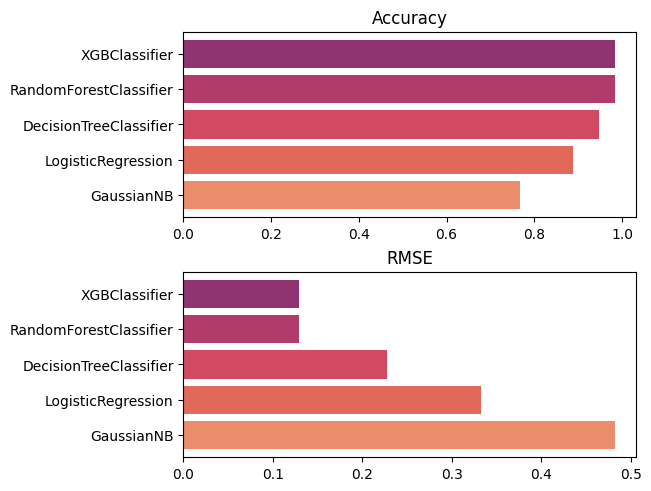

In [44]:
# Visualize model performance
fig, (ax1, ax2) = plt.subplots(2, layout='constrained')

model_performance_df.sort_values(by='Accuracy', inplace=True)
ax1.barh(model_performance_df['ModelName'], model_performance_df['Accuracy'], color=sns.color_palette('flare'))
ax1.set_title('Accuracy')

model_performance_df.sort_values(by='RMSE', ascending=False, inplace=True)
ax2.barh(model_performance_df['ModelName'], model_performance_df['RMSE'], color=sns.color_palette('flare'))
ax2.set_title('RMSE')

Looking at the chart above, we can see that XGBClassifier is our best performing model. So, we can further improve its performance with Hyperparameter Tuning.

### Hyperparameter Tuning

One simple approach to hyperparameter tuning is to use [GridSearch CV](https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee) to search for the best hyperparameter for the model that gives the highest accuracy.

We can look at the list of hyperparameters for a XGBoost model and how to tune them by referring to [this link](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

Since setting different hyperparameters in one go is faster, but it creates more combinations of hyperparameters to search and see which are the best. Hence, we are going to tune them in stages.

In [45]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': range(1, 10),
    'min_child_weight': range(0, 5),
}

clf = GridSearchCV(XGBClassifier(random_state=161223), param_grid=params, scoring='accuracy', cv=4)
clf.fit(X_train, y_train)
clf.best_params_, clf.best_score_

({'max_depth': 7, 'min_child_weight': 0}, 0.9793086660175268)

Now we have our values set for this two hyperparameters, we can continue tune on other hyperparameters.

In [46]:
params = {
    'max_depth': [7],
    'min_child_weight': [0],
    'gamma': [i/10.0 for i in range(0, 5)],
    'subsample': [i/10.0 for i in range(0, 10)],
    'colsample_bytree': [i/10.0 for i in range(0, 10)],
}

clf = GridSearchCV(XGBClassifier(random_state=161223), param_grid=params, scoring='accuracy', cv=4)
clf.fit(X_train, y_train)
clf.best_params_, clf.best_score_

({'colsample_bytree': 0.7,
  'gamma': 0.0,
  'max_depth': 7,
  'min_child_weight': 0,
  'subsample': 0.9},
 0.9817429406037002)

Then, we can perform our next hyperparameter tuning on regularization.

In [47]:
params = {
    'colsample_bytree': [0.7],
    'gamma': [0.0],
    'max_depth': [7],
    'min_child_weight': [0],
    'subsample': [0.9],
    'reg_alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
}

clf = GridSearchCV(XGBClassifier(random_state=161223), param_grid=params, scoring='accuracy', cv=4)
clf.fit(X_train, y_train)
clf.best_params_, clf.best_score_

({'colsample_bytree': 0.7,
  'gamma': 0.0,
  'max_depth': 7,
  'min_child_weight': 0,
  'reg_alpha': 1e-05,
  'subsample': 0.9},
 0.9817429406037002)

We can see that other `reg_alpha` values do not change the model score significantly, so the original `reg_alpha` value is good already.

In [48]:
params = {
    'colsample_bytree': [0.7],
    'gamma': [0.0],
    'max_depth': [7],
    'min_child_weight': [0],
    'subsample': [0.9],
}

clf = GridSearchCV(XGBClassifier(random_state=161223), param_grid=params, scoring='accuracy', cv=4)
clf.fit(X_train, y_train)
clf.best_params_, clf.best_score_

({'colsample_bytree': 0.7,
  'gamma': 0.0,
  'max_depth': 7,
  'min_child_weight': 0,
  'subsample': 0.9},
 0.9817429406037002)

Now we have most of the hyperparameter tuned, and we can placed these parameters into our `XGBClassifier` model.

## Pipelining

Since our data is preprocessed before entering into our ML model, we can create a [pipeline](https://www.freecodecamp.org/news/machine-learning-pipeline/). This allow us to generalize a dataset input from data preprocess to the ML model prediction and receive a output.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Create preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
])

# Create final pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', XGBClassifier(random_state=161223, **clf.best_params_))
])

We can visualize our pipeline in a flow diagram.

In [50]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object'))])),
                ('model',...
                               feature_types=None, gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=0,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=161223, ...))])

### Export Pipeline

Now we can export our pipeline for deployment using `joblib` library.

In [51]:
import joblib

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'pipeline.pkl', compress=True)

['pipeline.pkl']

### Load Pipeline

We can load our pipeline and predict it with our new test data to see if it works as expected.

In [52]:
pipeline_loaded = joblib.load('pipeline.pkl')
pipeline_loaded.score(X_test, y_test)

0.9873540856031129

As what we expect, our pipeline is able to preprocess the data correctly and give us a fairly accurate result.